In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Download zip file
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip

# Unzip it
!unzip HTRU2.zip

--2023-01-30 17:13:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1563015 (1.5M) [application/x-httpd-php]
Saving to: ‘HTRU2.zip’

HTRU2.zip           100%[===================>]   1.49M   308KB/s    in 5.0s    

2023-01-30 17:13:09 (308 KB/s) - ‘HTRU2.zip’ saved [1563015/1563015]

Archive:  HTRU2.zip
  inflating: HTRU_2.csv              
  inflating: HTRU_2.arff             
  inflating: Readme.txt              


In [6]:
# Load data into a pandas dataframe
data = pd.read_csv("HTRU_2.csv", names=['mean_ip', 'sd_ip', 'ec_ip', 
                                        'sw_ip', 'mean_dm', 'sd_dm', 
                                        'ec_dm', 'sw_dm', 'pulsar'])

# Take a look at the data
data.head()

,mean_ip,sd_ip,ec_ip,sw_ip,mean_dm,sd_dm,ec_dm,sw_dm,pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


+ But first, scale the data. If you do an exploratory analysis of the data you will see that this dataset has a lot of outliers. Because of this you are going to use a RobustScaler, which scales features using statistics that are robust to outliers.

In [7]:
from sklearn.preprocessing import RobustScaler
# split feature from labels
features = data[[col for col in data.columns if col != "plusar" ]]
labels = data.pulsar
robust_data = RobustScaler().fit_transform(features)

## Now perform PCA using sklearn

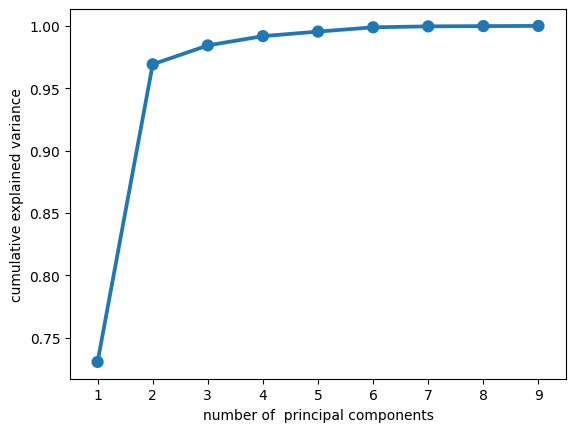

In [9]:
from sklearn.decomposition import PCA
pca_all = PCA()
# fit scaled data
pca_all.fit(robust_data)
# save cumulative explained variance
cum_var = (np.cumsum(pca_all.explained_variance_ratio_))
n_comp = [i for i in range(1,pca_all.n_components_ + 1)]

# Plot cumulative variance
ax = sns.pointplot(x=n_comp, y=cum_var)
ax.set(xlabel='number of  principal components', ylabel='cumulative explained variance')
plt.show()

**Wow! With just 3 components almost all of the variance of the original data is explained! This makes you think that there were some highly correlated features in the original data.**
> Let's plot the first 3 principal components:

/tmp/ipykernel_5778/2871050720.py:15: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
/tmp/ipykernel_5778/2871050720.py:17: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
/tmp/ipykernel_5778/2871050720.py:19: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


[Text(-4.0, 0, ''),
 Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, ''),
 Text(8.0, 0, ''),
 Text(10.0, 0, ''),
 Text(12.0, 0, '')]

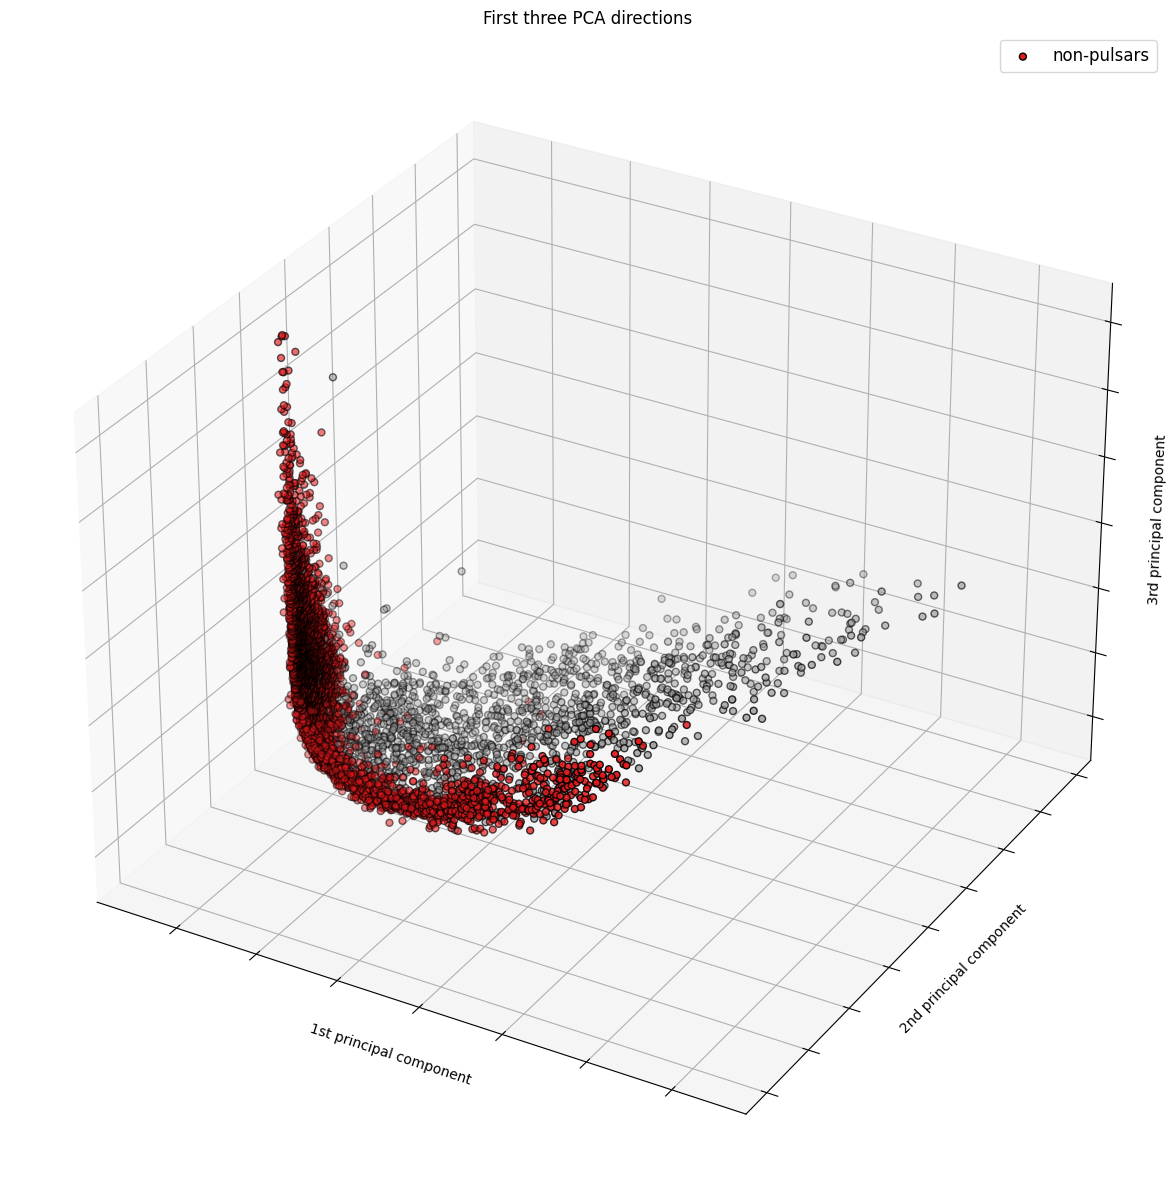

In [13]:
from mpl_toolkits.mplot3d import Axes3D
pca_3 = PCA(3)
pca_3.fit(robust_data)
data_3pc = pca_3.transform(robust_data)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_3pc[:, 0], data_3pc[:, 1], data_3pc[:, 2], c=labels,
           cmap=plt.cm.Set1, edgecolor='k', s=25, label=data['pulsar'])

ax.legend(["non-pulsars"], fontsize="large")

ax.set_title("First three PCA directions")
ax.set_xlabel("1st principal component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd principal component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd principal component")
ax.w_zaxis.set_ticklabels([])

Trong trường hợp này, thật hợp lý khi nghĩ rằng kích thước có thể giảm hơn nữa vì với 2 thành phần chính, hơn 95% phương sai của dữ liệu gốc được giải thích. Bây giờ hãy chỉ vẽ hai thành phần chính đầu tiên:

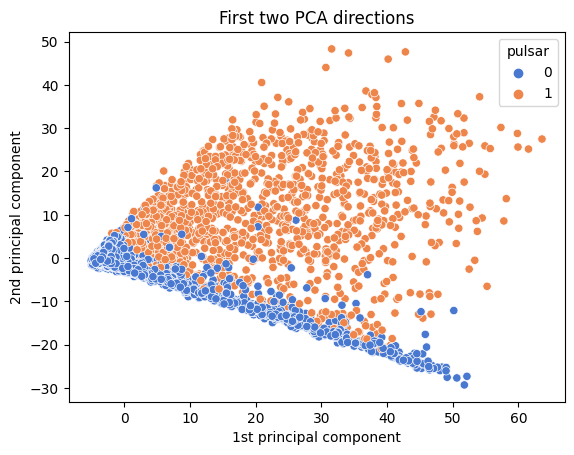

In [14]:
# Instantiate PCA with 2 components
pca_2 = PCA(2)

# Fit and transform scaled data
pca_2.fit(robust_data)
data_2pc = pca_2.transform(robust_data)

# Render the 2D plot
ax = sns.scatterplot(x=data_2pc[:,0], 
                     y=data_2pc[:,1], 
                     hue=labels,
                     palette=sns.color_palette("muted", n_colors=2))

ax.set(xlabel='1st principal component', ylabel='2nd principal component', title='First two PCA directions')
plt.show()

**Using PCA you've successfully reduced the dimensionality from 8 to 2 while maintaining a lot of the variance of the original data!**

## **Singular Value Decomposition - SVD**

SVD is one way to decompose matrices. Remember that matrices can be seen as linear transformations in space. PCA relies on eigendecomposition, which can only be done for square matrices. You might wonder why the first example worked with PCA if the data had far more observations than features. The reason is that when performing PCA you end up using the matrix product $X^{t}X$ which is a square matrix.

However you don’t always have square matrices, and sometimes you have really sparse matrices.

To decompose these types of matrices, which can’t be decomposed with eigendecomposition, you can use techniques such as Singular Value Decomposition. SVD decomposes the original dataset into its constituents, resulting in a reduction of dimensionality. It is used to remove redundant features from the dataset.

To check SVD you are going to use the [digits dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html), which is made up of 1797 8x8 images of handwritten digits:




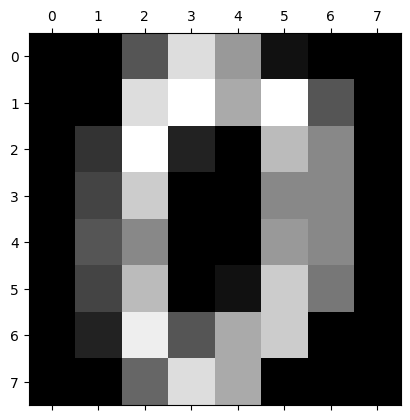

In [15]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Plot first digit
image = digits.data[0].reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [16]:
# Save data into X variable
X = digits.data

# Normalize pixel values
X = X/255

# Print shapes of dataset and data points
print(f"Digits data has shape {X.shape}\n")
print(f"Each data point has shape {X[0].shape}\n")

Digits data has shape (1797, 64)

Each data point has shape (64,)



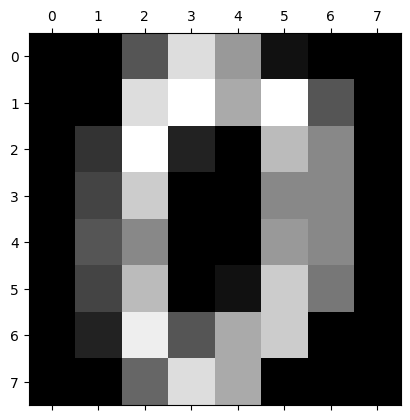

In [17]:
image = X[0].reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

The image should be identical to the one without normalization. This is because the relative brightness of each pixel with the others is maintained. Normalization is done as a preprocessing step when feeding the data into a Neural Network. Here it is done since it is a step that is usually always done when working with image data.

Now perform SVD on the data and plot the cumulative amount of explained variance for every number of components. Note that the [TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) needs a number of components strictly lower to the number of features.

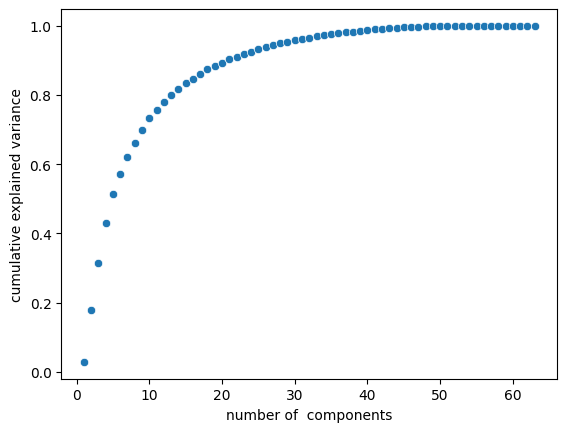

In [18]:
from sklearn.decomposition import TruncatedSVD

# Instantiate Truncated SVD with (original dimension - 1) components
org_dim = X.shape[1]
tsvd = TruncatedSVD(org_dim - 1)
tsvd.fit(X)

# Save cumulative explained variance
cum_var = (np.cumsum(tsvd.explained_variance_ratio_))
n_comp = [i for i in range(1, org_dim)]

# Plot cumulative variance
ax = sns.scatterplot(x=n_comp, y=cum_var)
ax.set(xlabel='number of  components', ylabel='cumulative explained variance')
plt.show()

In [19]:
print(f"Explained variance with 5 components: {float(cum_var[4:5])*100:.2f}%")

Explained variance with 5 components: 51.53%


In [20]:
print(f"Explained variance with 20 components: {float(cum_var[19:20])*100:.2f}%")

Explained variance with 20 components: 89.41%


Let's check what you get when performing SVD with only 5 components:

In [21]:
# Instantiate a Truncated SVD with 5 components
tsvd = TruncatedSVD(n_components=5)

# Get the transformed data
X_tsvd = tsvd.fit_transform(X)

# Print shapes of dataset and data points
print(f"Original data points have shape {X[0].shape}\n")
print(f"Transformed data points have shape {X_tsvd[0].shape}\n")

Original data points have shape (64,)

Transformed data points have shape (5,)



By doing this you are now representing each digit using 5 dimensions instead of the original 64! Isn't that amazing?

Now check how this looks like visually:

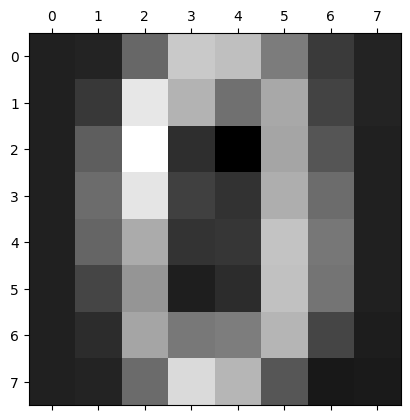

In [22]:
image_reduced_5 = tsvd.inverse_transform(X_tsvd[0].reshape(1, -1))
image_reduced_5 = image_reduced_5.reshape((8, 8))
plt.matshow(image_reduced_5, cmap = 'gray')
plt.show()

It looks blurry but you can still tell this is a zero.

#### Using more components

In [23]:
def image_given_components(n_components, verbose=True):
  tsvd = TruncatedSVD(n_components=n_components)
  X_tsvd = tsvd.fit_transform(X)
  if verbose:
    print(f"Explained variance with {n_components} components: {float(tsvd.explained_variance_ratio_.sum())*100:.2f}%\n")
  image = tsvd.inverse_transform(X_tsvd[0].reshape(1, -1))
  image = image.reshape((8, 8))
  return image


Explained variance with 32 components: 96.63%



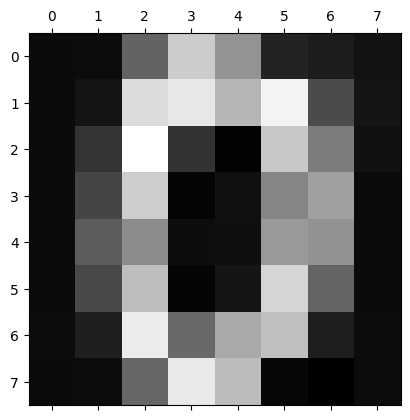

In [24]:
image_reduced_32 = image_given_components(32)
plt.matshow(image_reduced_32, cmap = 'gray')
plt.show()

Hình ảnh này trông rất giống với hình ảnh ban đầu (không có gì ngạc nhiên vì hơn 95% phương sai ban đầu được giải thích) nhưng kích thước của các biểu diễn đã bị cắt làm đôi!

Để hiểu rõ hơn hình ảnh trông như thế nào tùy thuộc vào kích thước của các biểu diễn, ô tiếp theo vẽ chúng cạnh nhau (hình cuối cùng có một tham số mà bạn có thể điều chỉnh):

Explained variance with 1 components: 2.87%

Explained variance with 21 components: 90.31%



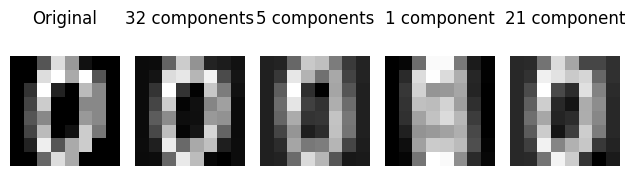

In [27]:
fig = plt.figure()

# Original image
ax1 = fig.add_subplot(1,5,1)
ax1.matshow(image, cmap = 'gray')
ax1.title.set_text('Original')
ax1.axis('off') 

# Using 32 components
ax2 = fig.add_subplot(1,5,2)
ax2.matshow(image_reduced_32, cmap = 'gray')
ax2.title.set_text('32 components')
ax2.axis('off') 

# Using 5 components
ax3 = fig.add_subplot(1,5,3)
ax3.matshow(image_reduced_5, cmap = 'gray')
ax3.title.set_text('5 components')
ax3.axis('off') 

# Using 1 components
ax4 = fig.add_subplot(1,5,4)
ax4.matshow(image_given_components(1), cmap = 'gray') # Change this parameter to see other representations
ax4.title.set_text('1 component')
ax4.axis('off')

ax5 = fig.add_subplot(1,5,5)
ax5.matshow(image_given_components(21), cmap = 'gray') # Change this parameter to see other representations
ax5.title.set_text('21 component')
ax5.axis('off')

plt.tight_layout()
plt.show()

## **Non-negative Matrix Factorization - NMF**
NMF thể hiện các mẫu dưới dạng sự kết hợp của các phần có thể hiểu được. Ví dụ: nó biểu thị các tài liệu dưới dạng kết hợp các chủ đề và hình ảnh theo các mẫu hình ảnh thường xảy ra.
NMF, giống như PCA, là một kỹ thuật giảm kích thước. Tuy nhiên, trái ngược với PCA, các mô hình NMF có thể hiểu được.
Điều này có nghĩa là các mô hình NMF dễ hiểu hơn và chúng tôi dễ dàng giải thích cho người khác hơn nhiều. Tuy nhiên, **NMF không thể được áp dụng cho mọi tập dữ liệu. Nó yêu cầu các tính năng mẫu không âm, do đó lớn hơn hoặc bằng 0.**

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups

# Download data
data = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

# Get the actual text data from the sklearn Bunch
data = data.get("data")

In [31]:
print(f"Data has {len(data)} elements.\n")
print(f"First 2 elements: \n")
for n, d in enumerate(data[:2], start=1):
  print("======"*10)
  print(f"Element number {n}:\n\n{d}\n")

Data has 11314 elements.

First 2 elements: 

Element number 1:

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Element number 2:

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the networ

Bây giờ bạn cần biểu diễn văn bản dưới dạng vectơ, để làm điều này, bạn sẽ sử dụng TfidfVectorizer với max_features được đặt thành 500. Đây sẽ là kích thước ban đầu của dữ liệu (mà bạn sẽ giảm thông qua NMF).

In [32]:
# Instantiate vectorizer setting dimensionality of data
# The stop_words param refer to words (in english) that don't add much value to the content of the document and must be ommited
vectorizer = TfidfVectorizer(max_features=500, stop_words='english')

# Vectorize original data
vect_data = vectorizer.fit_transform(data)


# Print dimensionality
print(f"Data has shape {vect_data.shape} after vectorization.")
print(f"Each data point has shape {vect_data[0].shape} after vectorization.")

Data has shape (11314, 500) after vectorization.
Each data point has shape (1, 500) after vectorization.


In [34]:
# Desired number of components
n_comp = 5

# Instantiate NMF with the desired number of components
nmf = NMF(n_components=n_comp, random_state=42)

# Apply NMF to the vectorized data
nmf.fit(vect_data)

reduced_vect_data = nmf.transform(vect_data)

# Print dimensionality
print(f"Data has shape {reduced_vect_data.shape} after NMF.")
print(f"Each data point has shape {reduced_vect_data[0].shape} after NMF.")

# Save feature names for plotting
feature_names = vectorizer.get_feature_names_out()

Data has shape (11314, 5) after NMF.
Each data point has shape (5,) after NMF.


Now every data point is being represented by a vector of `n_comp` dimensions rather than the original 500!

In this case every component represents a topic and each data point is represented as a combination of those topics. The value for each topic can be interpreted as how strong the relationship between the text and that particular topic is.

Check this for the 1st element of the text data:

In [35]:
print(f"Original text:\n{data[0]}\n")

print(f"Representation based on topics:\n{reduced_vect_data[0]}")

Original text:
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Representation based on topics:
[0.00554834 0.         0.         0.05431621 0.04026962]


Looks like this text can be expressed as a combination of the first, fourth and fifth topic. Specially the later two.

At this point you might wonder what these topics are. Since we didn't provide labels, these topics arised from the data. To have a sense of what these topics are, plot the top 20 words for each topic:

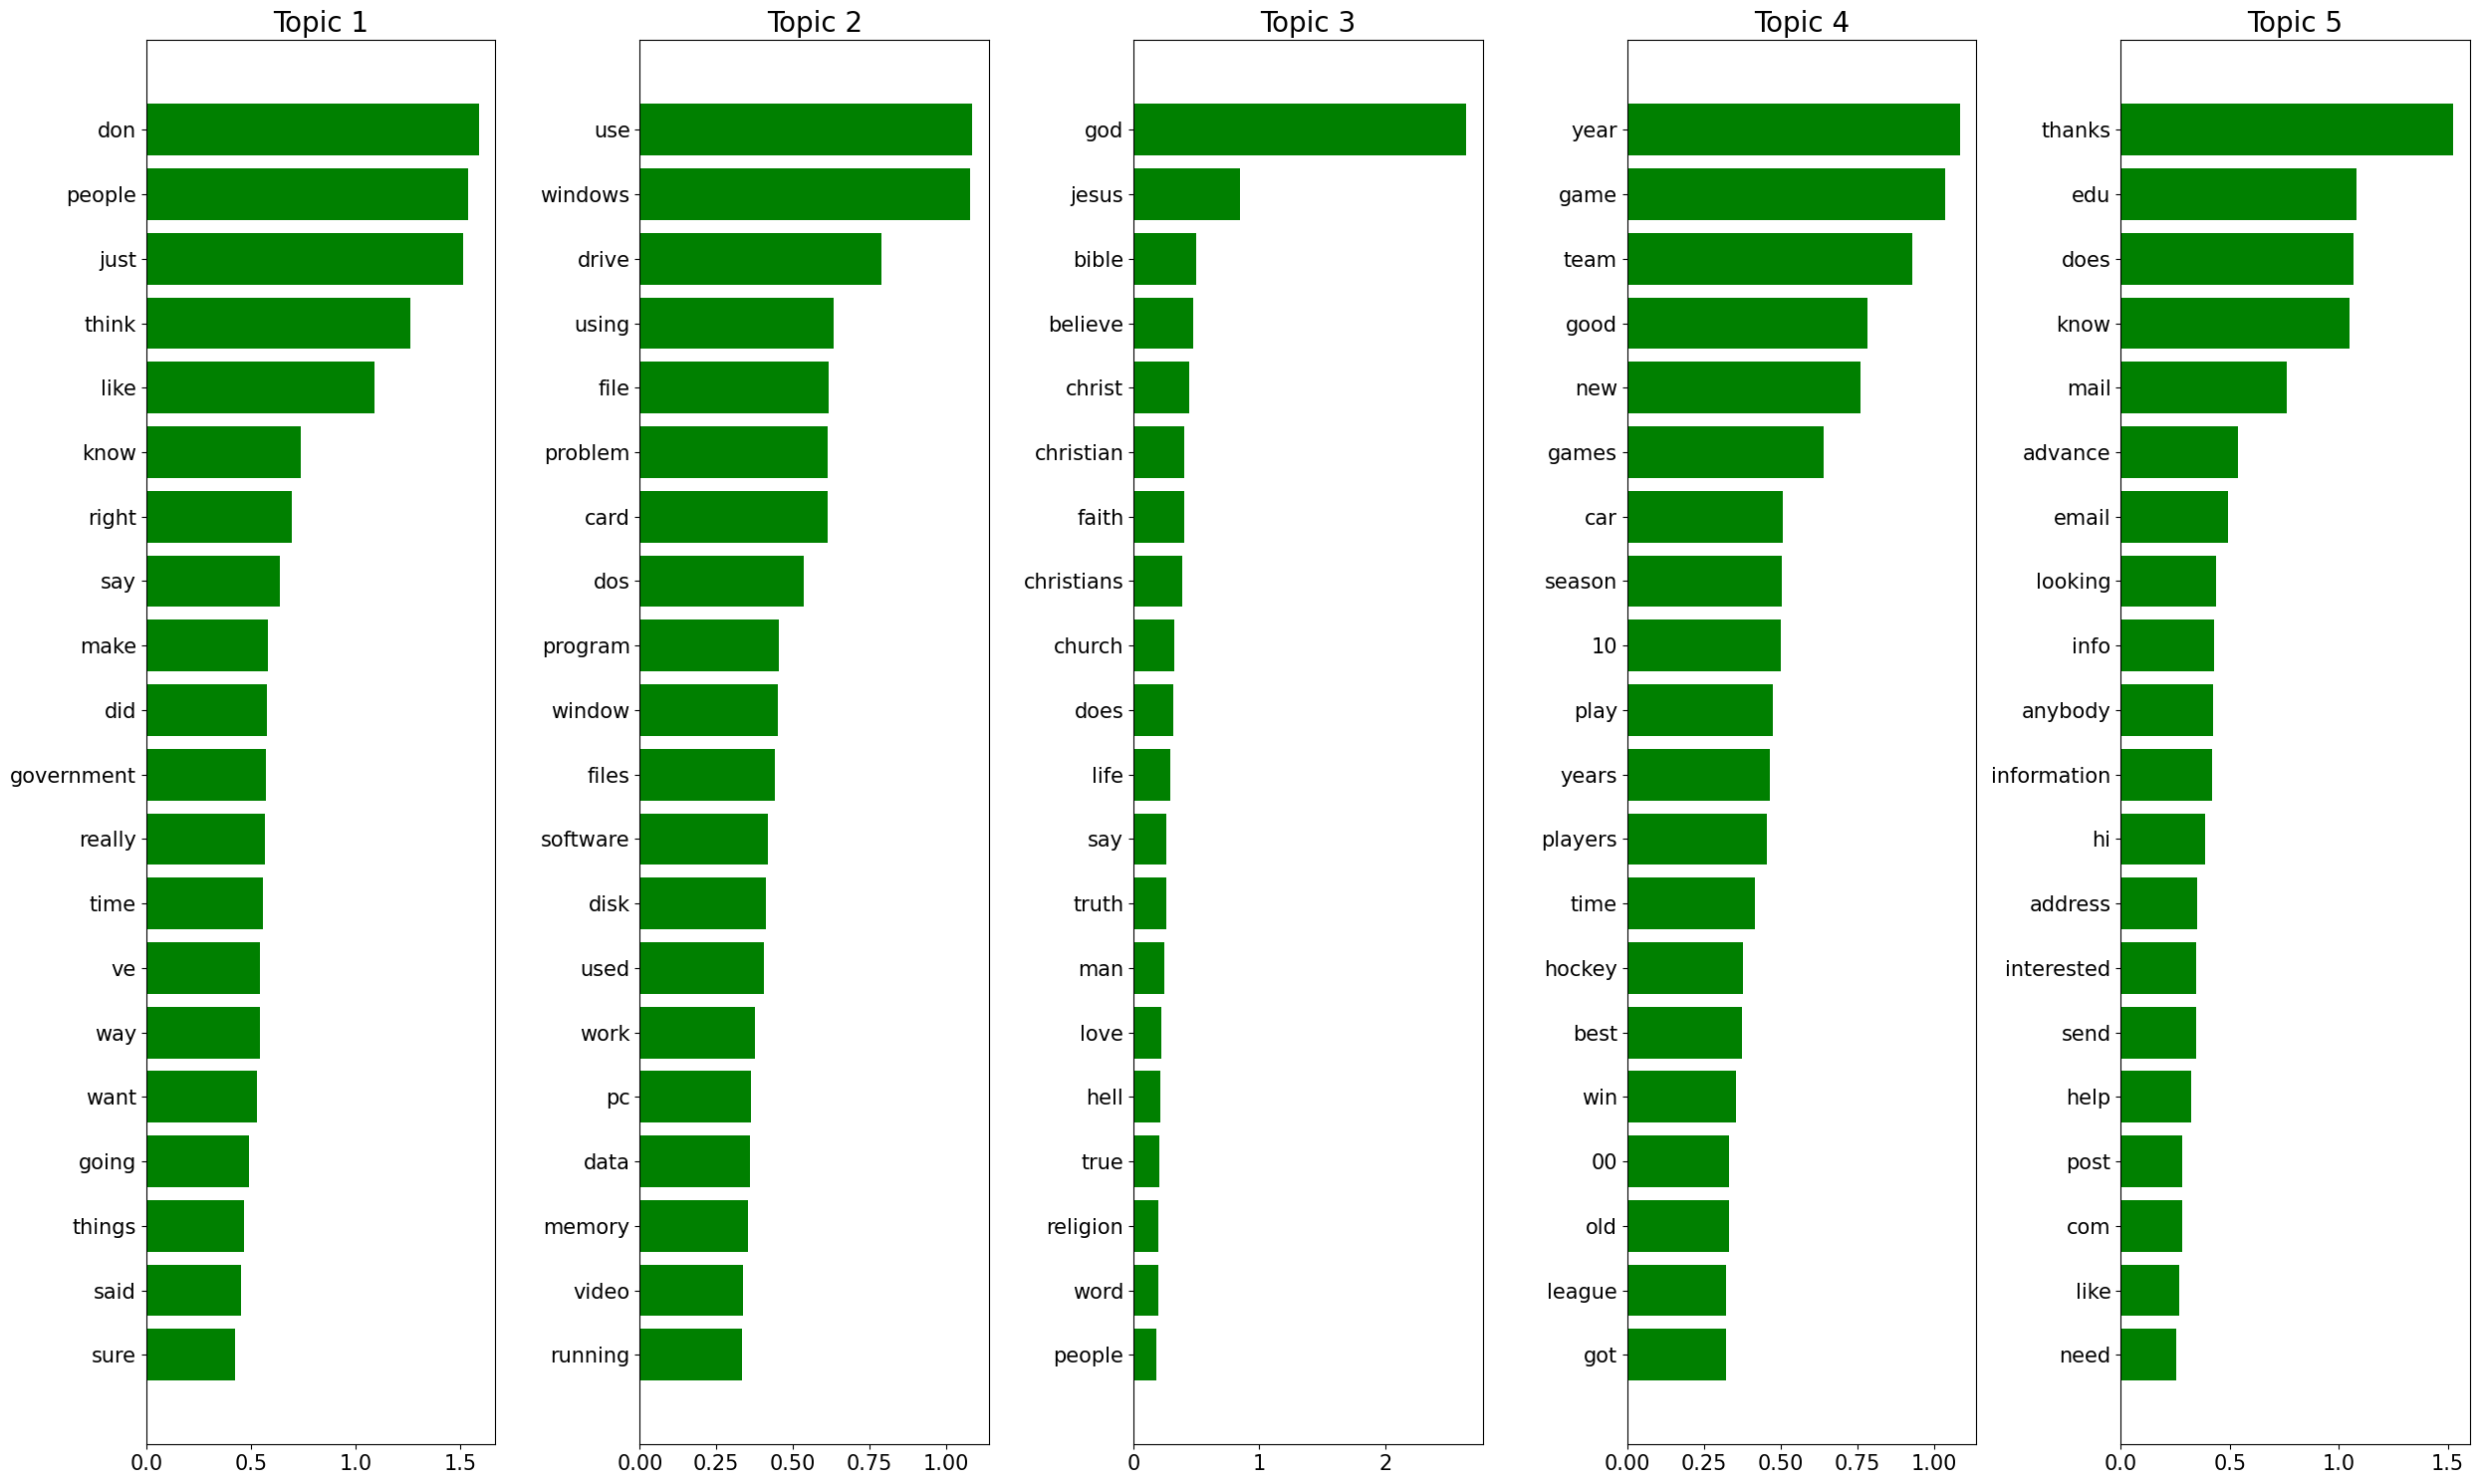

In [36]:
# Define function for plotting top 20 words for each topic
def plot_words_for_topics(n_comp, nmf, feature_names):
  fig, axes = plt.subplots(((n_comp-1)//5)+1, 5, figsize=(25, 15))
  axes = axes.flatten()

  for num_topic, topic in enumerate(nmf.components_, start=1):

    # Plot only the top 20 words

    # Get the top 20 indexes
    top_indexes = np.flip(topic.argsort()[-20:])

    # Get the corresponding feature name
    top_features = [feature_names[i] for i in top_indexes]

    # Get the importance of each word
    importance = topic[top_indexes]

    # Plot a barplot
    ax = axes[num_topic-1]
    ax.barh(top_features, importance, color="green")
    ax.set_title(f"Topic {num_topic}", {"fontsize": 20})
    ax.invert_yaxis()
    ax.tick_params(labelsize=15)

  plt.tight_layout()
  plt.show()

# Run the function
plot_words_for_topics(n_comp, nmf, feature_names)

Let's try to summarize each topic based on the top most common words for each one:

- The first topic is hard to describe but seems to be related to people and actions. 

- The second one is clearly abouth tech stuff.

- Third one is about religion.

- Fourth one seems to revolve around sports and/or games.

- And the fifth one about education and/or information.


This makes sense considering the example with the first element of the text data. That text is mostly about cars (sports) and information.

Pretty cool, right?


In [40]:
def try_NMF(n_comp):
  nmf = NMF(n_components=n_comp, random_state=42)
  nmf.fit(vect_data)
  feature_names = vectorizer.get_feature_names_out()
  plot_words_for_topics(n_comp, nmf, feature_names)

/home/tuandinh/Desktop/MLOPs/Machine-Learning-For-Production-2022/venv/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


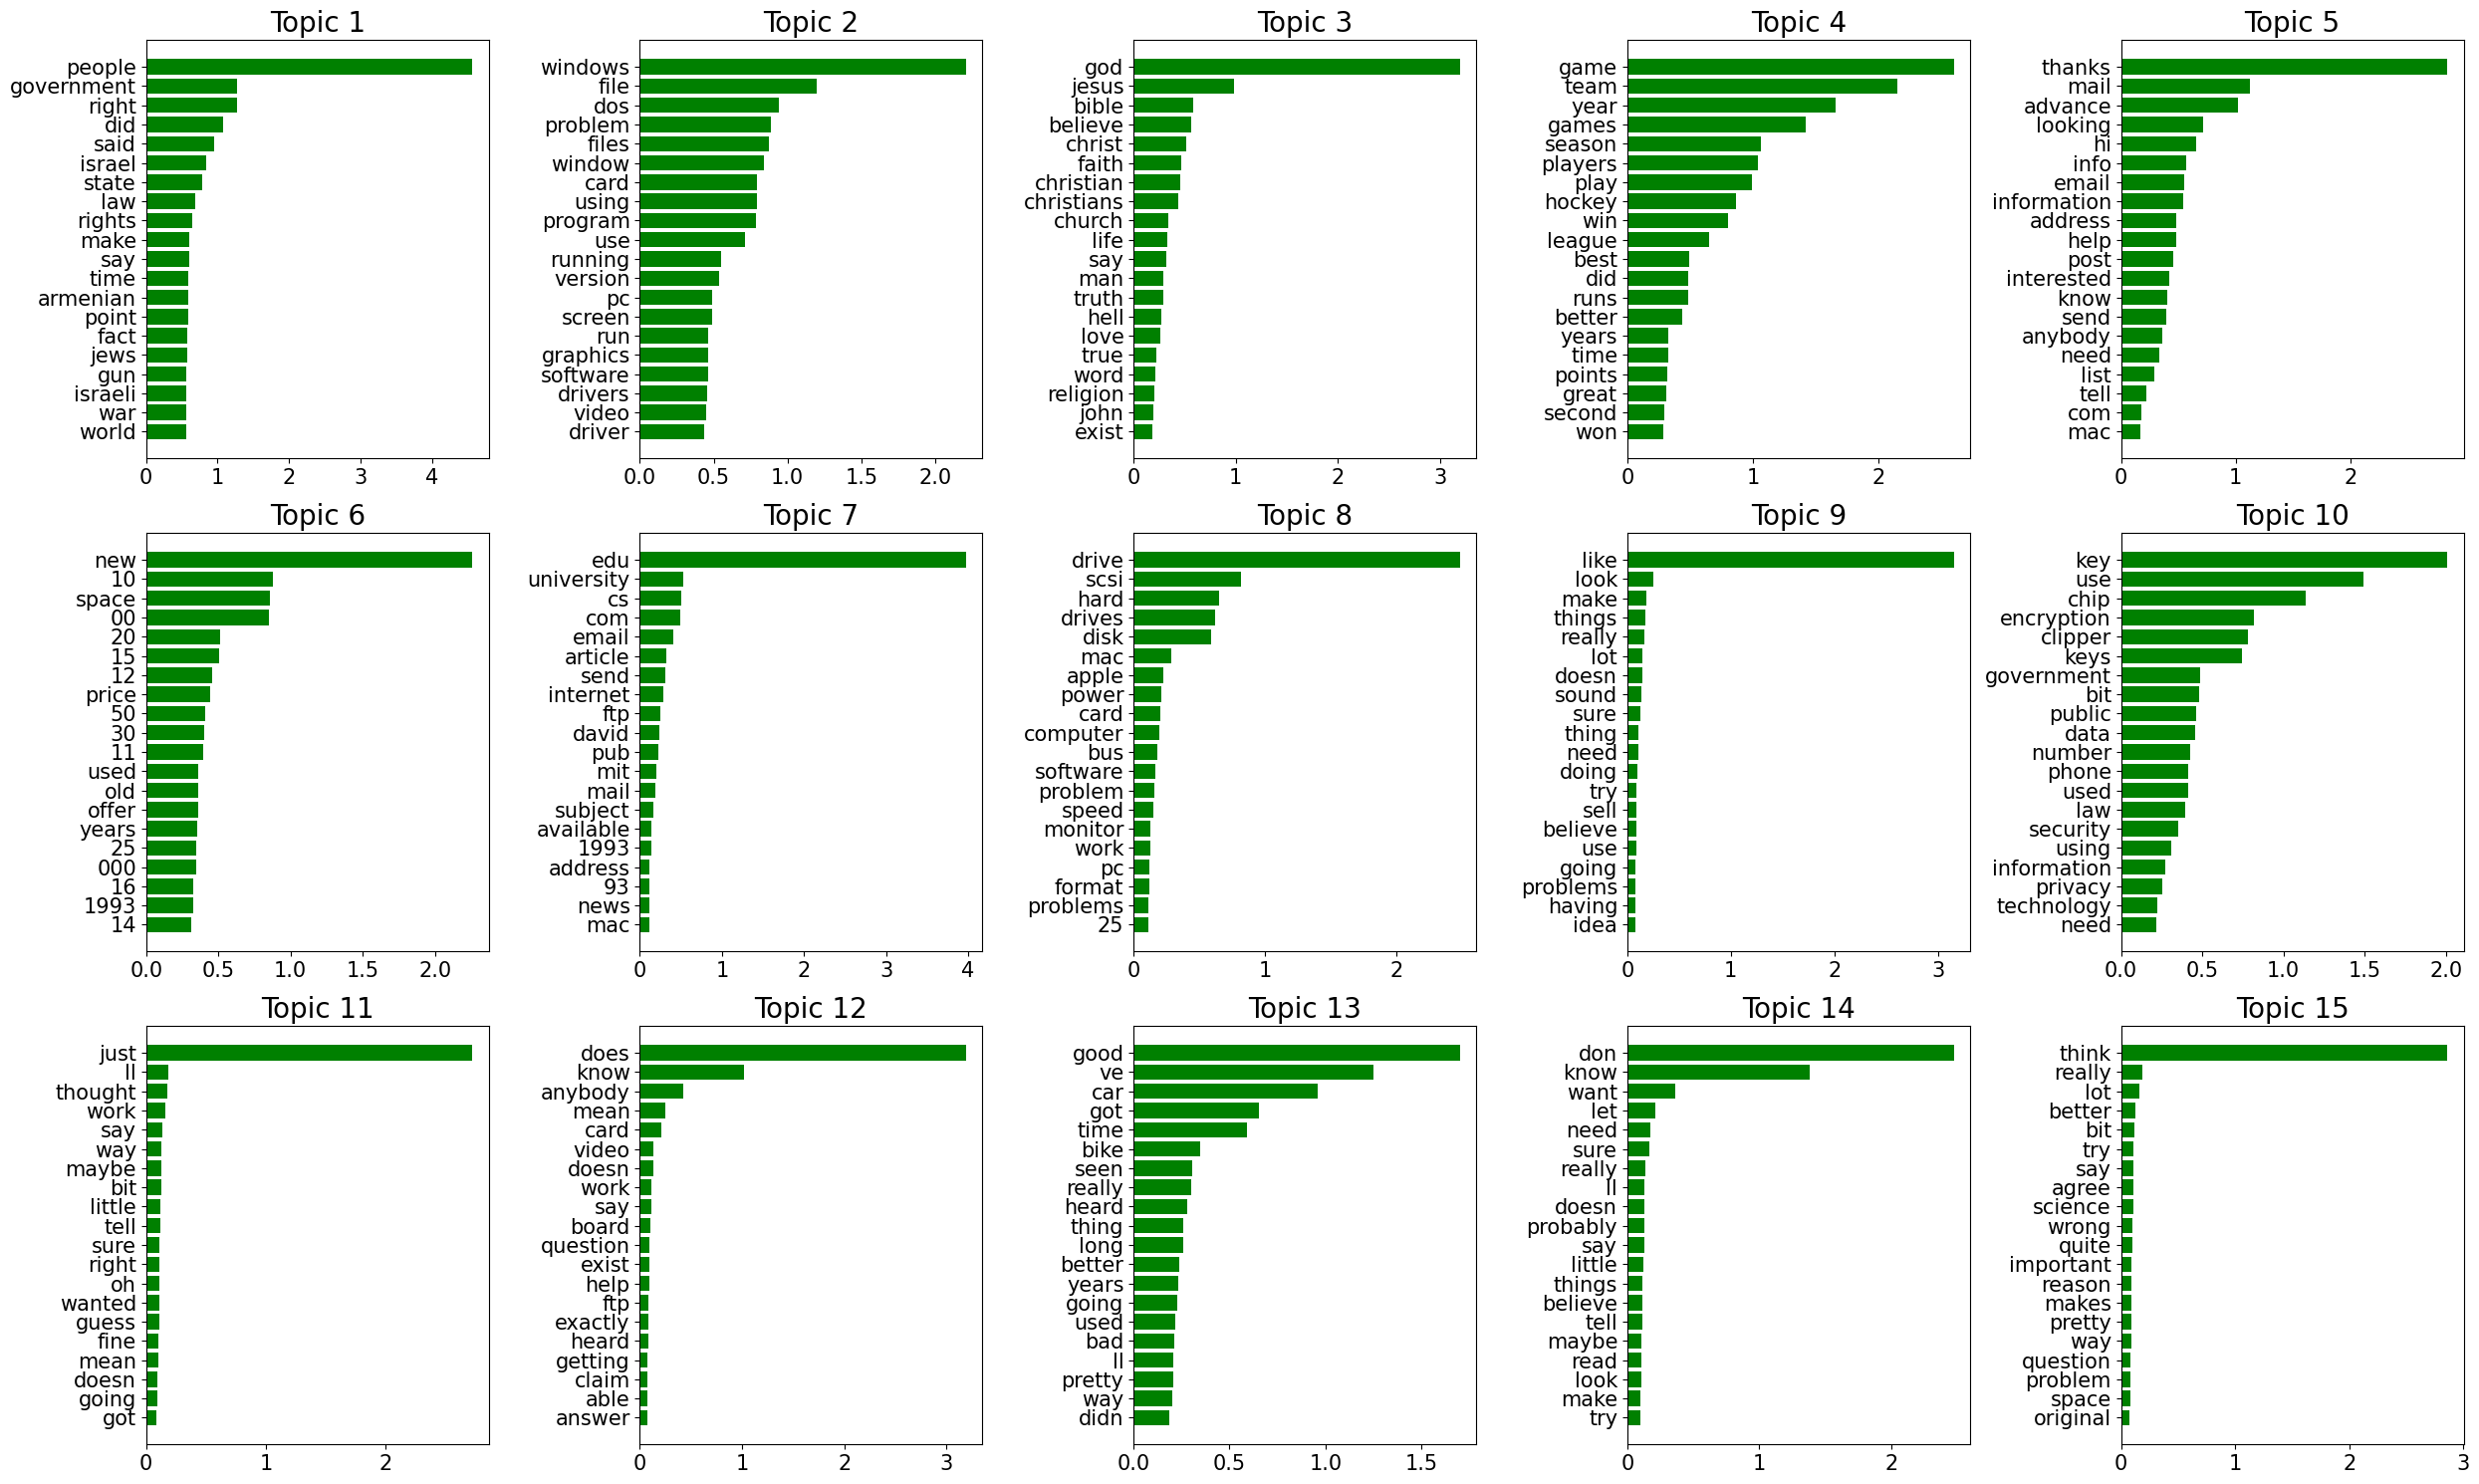

In [43]:
# Try different values!
try_NMF(15)